In [507]:
import numpy as np

from probts.data.data_utils.data_scaler import Scaler, StandardScaler, IdentityScaler, TemporalScaler, BinScaler, \
    BinaryQuantizer

from probts.model.forecaster import LinearForecaster, NaiveForecaster
from probts.model.forecast_module import ProbTSForecastModule
from probts.data import ProbTSDataModule, DataManager, ProbTSBatchData
from probts.utils import find_best_epoch
from lightning import Trainer
from pytorch_lightning.loggers import CSVLogger
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [508]:
# class BinaryQuantizer(Scaler):
#     def __init__(self, num_bins=200, min_val=-10.0, max_val=10.0):
#         super().__init__()
#         self.num_bins = num_bins
#         self.min_val = min_val
#         self.max_val = max_val
#         self.bin_values_ = torch.linspace(self.min_val, self.max_val, self.num_bins)
#
#     def fit(self, values):
#         self.min_val = values.min()
#         self.max_val = values.max()
#         self.bin_values_ = torch.linspace(self.min_val, self.max_val, self.num_bins)
#
#     def fit_transform(self, values):
#         self.fit(values)
#         return self.transform(values)
#
#     def transform(self, values):
#         bin_thresholds = self.bin_values_.reshape(1, 1, -1)
#         return (values >= bin_thresholds).float()
#
#     def inverse_transform(self, values):
#         reversed_bin = torch.flip(values, dims=(-1,))
#         idx_first_one_reversed = reversed_bin.argmax(axis=-1)[..., None]
#         idx_last_one = self.num_bins - 1 - idx_first_one_reversed
#         reconstructed = self.bin_values_[idx_last_one]
#         return reconstructed

In [509]:
# class StandardBinScaler(Scaler):
#     def __init__(self, standard: StandardScaler, bin: BinaryQuantizer):
#         super().__init__()
#         self.standard = standard
#         self.bin = bin
#
#     def fit(self, X):
#         Z = self.standard.fit_transform(X)
#         self.bin.fit(Z)
#         # print('the scaler was fitted')
#
#     def transform(self, X):
#         Z = self.standard.transform(X)
#         return self.bin.transform(Z)
#
#     def fit_transform(self, X):
#         self.fit(X)
#         return self.transform(X)
#
#     def inverse_transform(self, X):
#         Z = self.bin.inverse_transform(X)
#         return self.standard.inverse_transform(Z)

In [510]:
# data_manager = DataManager(
#     dataset='tourism_monthly',
#     path='../datasets',
#     context_length=12,
#     prediction_length=12,
# )
# data_manager.context_length

In [511]:
# class CustomDataManager(DataManager):
#     def _configure_scaler(self, scaler_type: str):
#         """Configure the scaler."""
#         if scaler_type == "standard":
#             return StandardScaler(var_specific=self.var_specific_norm)
#         elif scaler_type == "temporal":
#             return TemporalScaler()
#         elif scaler_type == "binary":
#             return BinaryQuantizer()
#         elif scaler_type == "normalization+binary":
#             # return StandardBinScaler(StandardScaler(var_specific=self.var_specific_norm), BinaryQuantizer())
#             return BinScaler(TemporalScaler(), BinaryQuantizer())
#         return IdentityScaler()

In [512]:
# data_module = ProbTSDataModule(
#     data_manager=data_manager,
#     batch_size=32,
#     test_batch_size=32,
#     num_workers=8,
# )
# test_dataloader = data_module.test_dataloader()
# train_dataloader = data_module.train_dataloader()
# val_dataloader = data_module.val_dataloader()

In [513]:
# for test_batch in test_dataloader:
#     break

In [514]:
# batch_data = ProbTSBatchData(test_batch, 'cpu')
# batch_data.past_target_cdf.shape

In [515]:
# plt.figure(figsize=(10,3))
# plt.plot(batch_data.past_target_cdf[13, :, 0].t())
# plt.show()

In [516]:
# scaler = StandardBinScaler(StandardScaler(), BinaryQuantizer())
# scaler.fit(batch_data.past_target_cdf)
# transformed = scaler.transform(batch_data.past_target_cdf)
# transformed.shape

In [517]:
# plt.figure(figsize=(10,3))
# plt.imshow(transformed[13].T, aspect='auto', interpolation='none', cmap='Reds')
# plt.show()

In [518]:
# reconstructed = scaler.inverse_transform(transformed)
# reconstructed.shape

In [519]:
# plt.figure(figsize=(10,3))
# plt.plot(reconstructed[13, :, 0].t())
# plt.show()


In [520]:
data_manager = DataManager(
    # dataset='tourism_monthly',
    # dataset='m4_daily',
    dataset='m4_weekly',
    path='../datasets',
    context_length=39,
    prediction_length=13,
    scaler="identity",
)

# data_manager = DataManager(
#     dataset='m4_daily',
#     # dataset='etth1',
#     path='./datasets',
#     context_length=12,
#     prediction_length=12,
#     scaler="standard_binary",
# )

Loading Short-term Dataset: m4_weekly
No validation set is used.


In [521]:
# data_manager.dataset_raw.training_dataset

In [522]:
data_manager.context_length

39

In [523]:
data_module = ProbTSDataModule(
    data_manager=data_manager,
    batch_size=1,
    test_batch_size=1,
    num_workers=8,
)
test_dataloader = data_module.test_dataloader()
train_dataloader = data_module.train_dataloader()
val_dataloader = data_module.val_dataloader()

In [524]:
for test_batch in test_dataloader:
    break

In [525]:
test_batch['past_target_cdf'].shape

torch.Size([1, 40])

In [526]:
test_batch['past_target_cdf'].reshape(-1, 1).shape

torch.Size([40, 1])

In [527]:
# data_manager.scaler.standard.mean

In [528]:
data_manager.scaler.transform(test_batch['past_target_cdf'].reshape(-1, 1))

tensor([[36379.6602],
        [38543.0391],
        [38543.0391],
        [37987.6094],
        [37987.6094],
        [38806.2891],
        [38806.2891],
        [38814.1094],
        [38814.1094],
        [39440.6094],
        [39440.6094],
        [38559.3398],
        [38559.3398],
        [38886.2109],
        [38886.2109],
        [38672.6289],
        [38672.6289],
        [38314.7812],
        [38314.7812],
        [38262.3281],
        [38262.3281],
        [38698.1289],
        [38698.1289],
        [38619.6992],
        [38619.6992],
        [37171.8086],
        [37171.8086],
        [37828.6484],
        [37828.6484],
        [37894.9102],
        [37894.9102],
        [38264.0391],
        [38264.0391],
        [38126.4805],
        [38126.4805],
        [38429.9297],
        [38429.9297],
        [36565.1797],
        [36565.1797],
        [35397.1602]])

In [529]:
# for train_batch in train_dataloader:
#     break

In [530]:
# batch_data = ProbTSBatchData(test_batch, 'cpu')
# batch_data.past_target_cdf.shape

In [531]:
data_manager.context_length

39

In [532]:
from probts.model.forecaster.prob_forecaster.binconv import BinConv

In [533]:
### h = 2, L =5
### total: 7
### target indexes: 5,6
## h=0 - 0:5 [0,1,2,3,4]
## h=1 - 1:6 [1,2,3,4,5]

In [534]:
# def most_probable_monotonic_sequence(p: torch.Tensor, is_sample: bool, eps: float = 1e-6):
#     """
#     p: Tensor of shape (B, D) with probabilities
#     Returns:
#         best_sequences: Tensor of shape (B, D) with the most probable [1...1, 0...0] sequence
#         best_probs: Tensor of shape (B,) with normalized probability of the best sequence
#     """
#     B, D = p.shape
#
#     # Clamp p to avoid log(0) or log(1) instability
#     p_clamped = p.clamp(min=eps, max=1 - eps)
#
#     # Use log domain to compute cumulative products
#     log_p = torch.log(p_clamped)
#     log_1_minus_p = torch.log(1 - p_clamped)
#
#     log_success = torch.cumsum(log_p, dim=1)  # shape (B, D)
#     log_fail = torch.cumsum(log_1_minus_p.flip(dims=[1]), dim=1).flip(dims=[1])  # shape (B, D)
#
#     # Pad with log(1) = 0 to align indexing
#     zero = torch.zeros((B, 1), dtype=p.dtype, device=p.device)
#     log_success = torch.cat([zero, log_success], dim=1)  # shape (B, D+1)
#     log_fail = torch.cat([log_fail, zero], dim=1)        # shape (B, D+1)
#
#     # Sum log-probs for each possible cutoff (index k: first 0 after all 1s)
#     log_probs = log_success + log_fail  # shape (B, D+1)
#     log_probs_max = torch.max(log_probs, dim=1, keepdim=True)[0]
#     probs_normalized = torch.exp(log_probs - log_probs_max)
#     probs_normalized = probs_normalized / probs_normalized.sum(dim=1, keepdim=True)
#
#     # Sample or take the most probable index
#     if is_sample:
#         k = torch.multinomial(probs_normalized, num_samples=1)
#     else:
#         k = torch.argmax(probs_normalized, dim=1, keepdim=True)
#
#     # Create the monotonic sequence [1,...,1,0,...,0]
#     arange = torch.arange(D, device=p.device).unsqueeze(0)
#     best_sequences = (arange < k).to(p.dtype)  # shape (B, D)
#
#     best_probs = torch.gather(probs_normalized, dim=1, index=k).squeeze(1)
#
#     return best_sequences, best_probs

In [535]:
# most_probable_monotonic_sequence(torch.tensor([1.0, 0.2]).reshape(1, -1), False)

In [536]:
# class DynamicTanh(nn.Module):
#     def __init__(self, normalized_shape, channels_last, alpha_init_value=0.5):
#         super().__init__()
#         self.normalized_shape = normalized_shape
#         self.alpha_init_value = alpha_init_value
#         self.channels_last = channels_last
#
#         self.alpha = nn.Parameter(torch.ones(1) * alpha_init_value)
#         self.weight = nn.Parameter(torch.ones(normalized_shape))
#         self.bias = nn.Parameter(torch.zeros(normalized_shape))
#
#     def forward(self, x):
#         x = torch.tanh(self.alpha * x)
#         if self.channels_last:
#             x = x * self.weight + self.bias
#         else:
#             # x = x * self.weight[:, None, None] + self.bias[:, None, None]
#             x = x * self.weight[:, None] + self.bias[:, None]
#         return x
#
#     def extra_repr(self):
#         return f"normalized_shape={self.normalized_shape}, alpha_init_value={self.alpha_init_value}, channels_last={self.channels_last}"


In [537]:
# from probts.model.forecaster import Forecaster
# from torch import nn
# import torch.nn.functional as F
#
#
# class BinConv(Forecaster):
#     def __init__(self, context_length: int, is_prob_forecast: bool, num_bins: int, kernel_size_across_bins_2d: int = 3,
#                  kernel_size_across_bins_1d: int = 3, num_filters_2d: int = 8,
#                  num_filters_1d: int = 32, is_cum_sum: bool = False, num_1d_layers: int = 2, num_blocks: int = 3,
#                  kernel_size_ffn: int = 51, dropout: float = 0.2,
#                  **kwargs) -> None:
#         """
#         Initialize the model with parameters.
#         """
#         super().__init__(context_length=context_length, **kwargs)
#         # Initialize model parameters here
#         self.context_length = context_length
#         self.num_bins = num_bins
#         self.is_prob_forecast = is_prob_forecast
#         self.num_filters_2d = num_filters_2d
#         self.num_filters_1d = num_filters_1d
#         self.kernel_size_across_bins_2d = kernel_size_across_bins_2d
#         self.kernel_size_across_bins_1d = kernel_size_across_bins_1d
#         self.is_cum_sum = is_cum_sum
#         self.scaler = BinScaler(StandardScaler(var_specific=True), BinaryQuantizer())
#         self.num_1d_layers = num_1d_layers
#         self.num_blocks = num_blocks
#         self.kernel_size_ffn = kernel_size_ffn
#         self.dropout = nn.Dropout(dropout)
#         # Conv2d over (context_length, num_bins)
#
#         self.conv2d = nn.ModuleList([nn.Conv2d(
#             in_channels=1,
#             out_channels=self.num_filters_2d,
#             # kernel_size=(context_length if i == 0 else kernel_size_across_bins_2d, kernel_size_across_bins_2d),
#             kernel_size=(context_length, kernel_size_across_bins_2d),
#             bias=True
#         ) for _ in range(num_blocks)
#         ])
#         self.conv1d = nn.ModuleList([
#             nn.ModuleList([
#                 nn.Conv1d(in_channels=num_filters_2d if i == 0 else num_filters_1d,
#                           out_channels=context_length if i == num_1d_layers - 1 else num_filters_1d,
#                           kernel_size=kernel_size_across_bins_1d, bias=True,
#                           groups=num_filters_1d)
#                 # groups=1)
#                 for i in range(num_1d_layers)
#             ]) for _ in range(num_blocks)
#         ])
#         self.conv_ffn = nn.Conv1d(
#             # in_channels=self.num_filters_1d,
#             in_channels=context_length,
#             out_channels=1,
#             kernel_size=kernel_size_ffn,  # large kernel size?
#             groups=1,
#             bias=True
#         )
#         print('conv 2d:')
#         print(self.conv2d)
#         print('conv 1d:')
#         print(self.conv1d)
#         print('conv ffn:')
#         print(self.conv_ffn)
#         assert num_filters_2d == num_filters_1d, "todo: change the self.act shape if not"
#         self.act = nn.ModuleList([
#             nn.ModuleList([
#                 # DynamicTanh(normalized_shape=num_filters_2d if i == 0 else num_filters_1d, channels_last=False)
#                 DynamicTanh(normalized_shape=num_filters_2d if i < self.num_1d_layers else context_length,
#                             channels_last=False)
#                 for i in range(self.num_1d_layers + 1)  # applied after conv2d, and all conv1d including the last one
#             ]) for _ in range(self.num_blocks)
#         ])
#
#     def _pad_channels(self, tensor: torch.Tensor, pad_size: int, pad_val_left=1.0, pad_val_right=0.0):
#         if pad_size == 0:
#             return tensor
#         left = torch.full((*tensor.shape[:-1], pad_size), pad_val_left, device=tensor.device)
#         right = torch.full((*tensor.shape[:-1], pad_size), pad_val_right, device=tensor.device)
#         return torch.cat([left, tensor, right], dim=-1)
#
#     def conv_layer(self, x: torch.Tensor, conv_func, act_func, kernel_size: int, is_2d: bool, ):
#         # kernel_size = self.kernel_size_across_bins_2d if is_2d else self.kernel_size_across_bins_1d
#         pad = kernel_size // 2 if kernel_size > 1 else 0
#         x_padded = self._pad_channels(x, pad)
#         if is_2d:
#             x_padded = x_padded.unsqueeze(1)
#         conv_out = conv_func(x_padded)  # (batch_size, num_filters_2d, num_bins)
#
#         if is_2d:
#             conv_out = conv_out.squeeze(2)
#         if act_func is not None:
#             conv_out = act_func(conv_out)
#         return conv_out
#
#     def forward(self, x):
#
#         x = x.float()
#         # x: (batch_size, context_length, num_bins)
#         batch_size, context_length, num_bins = x.shape
#         assert context_length == self.context_length, "Mismatch in context length"
#
#         for j in range(self.num_blocks):
#
#             residual = x
#             x = self.conv_layer(x, self.conv2d[j], self.act[j][0], self.kernel_size_across_bins_2d, True)
#             for i in range(self.num_1d_layers):
#                 # x = self.conv_layer(x, self.conv1d[j][i], self.act[j][i + 1], False)
#                 x = self.conv_layer(x, self.conv1d[j][i], F.relu,
#                                     self.kernel_size_across_bins_1d, False)
#             x = self.dropout(x)
#             x = x + residual
#
#         out = self.conv_layer(x, self.conv_ffn, None, self.kernel_size_ffn, False).squeeze(1)
#         # out = self.conv_ffn(x.squeeze(1))
#
#         if self.is_cum_sum:
#             assert False, "It degrades the performance"
#             out = torch.flip(torch.cumsum(torch.flip(out, dims=[1]), dim=1), dims=[1])
#         return out
#
#     def loss(self, batch_data):
#         """
#         Compute the loss for the given batch data.
#
#         Parameters:
#         batch_data [dict]: Dictionary containing input data and possibly target data.
#
#         Returns:
#         Tensor: Computed loss.
#         """
#         # Extract inputs and targets from batch_data
#         inputs = self.get_inputs(batch_data, 'all')
#         orig_target = inputs[:, -self.prediction_length:, :]
#
#         self.scaler.fit(inputs.reshape(-1)[:-self.prediction_length])
#         inputs = self.scaler.transform(inputs)
#
#         target = inputs[:, -self.prediction_length:, :]
#         inputs = sliding_window_batch(inputs, self.context_length, self.prediction_length).float()
#         outputs = self(inputs.view(-1, *inputs.shape[2:]))
#         loss = F.binary_cross_entropy_with_logits(input=outputs, target=target.view(-1, *target.shape[2:]), )
#         # print(f'loss: {loss}')
#         return loss
#
#     def forecast(self, batch_data, num_samples=None):
#         do_sample = num_samples is not None and num_samples > 1 and self.is_prob_forecast
#
#         inputs = self.get_inputs(batch_data, 'encode')
#
#         self.scaler.fit(inputs.reshape(-1))
#         inputs = self.scaler.transform(inputs)
#         if do_sample:
#             inputs = repeat(inputs.unsqueeze(1), num_samples, 1)  # (B, NS, T, D)
#             batch_size = inputs.shape[0]
#             inputs = inputs.view(-1, *inputs.shape[2:])
#         current_context = inputs.clone()
#         forecasts = []
#         for _ in range(self.prediction_length):
#             pred = F.sigmoid(self(current_context))  # (B, D)
#             # pred = (pred >= 0.5).int()
#             pred, _ = most_probable_monotonic_sequence(pred, do_sample)
#             pred = pred.int()
#             forecasts.append(pred.unsqueeze(1))  # (B, 1, D)
#             next_input = pred.unsqueeze(1)
#             current_context = torch.cat([current_context[:, 1:], next_input], dim=1)
#
#         forecasts = torch.cat(forecasts, dim=1)
#         forecasts = self.scaler.inverse_transform(forecasts)
#         if do_sample:
#             forecasts = forecasts.view(batch_size, num_samples, *forecasts.shape[1:])
#         else:
#             forecasts = forecasts.unsqueeze(1)  # (B, 1,  T, D)
#         return forecasts


In [538]:
data_manager.context_length

39

In [539]:
forecaster = BinConv(
    num_bins=200,
    is_prob_forecast=False,
    scaler_type='temporal',
    kernel_size_across_bins_2d=3,
    kernel_size_across_bins_1d=7,
    num_filters_2d=39,
    num_filters_1d=39,
    kernel_size_ffn=51,
    num_1d_layers=2,
    num_blocks=3,
    dropout=0.25,
    use_lags=False,
    use_feat_idx_emb=False,
    use_time_feat=False,
    target_dim=data_manager.target_dim,
    context_length=data_manager.context_length,
    prediction_length=data_manager.prediction_length,
    freq=data_manager.freq,
    lags_list=data_manager.lags_list,
    time_feat_dim=data_manager.time_feat_dim,
    dataset=data_manager.dataset,
)
model = ProbTSForecastModule(
    forecaster=forecaster,
    scaler=data_manager.scaler,
    learning_rate=0.001,
    quantiles_num=20,
    num_samples=100
)

conv 2d layers:
ModuleList(
  (0-2): 3 x Conv2d(1, 39, kernel_size=(39, 3), stride=(1, 1))
)
conv 1d layers:
ModuleList(
  (0-2): 3 x ModuleList(
    (0-1): 2 x Conv1d(39, 39, kernel_size=(7,), stride=(1,), groups=39)
  )
)
conv ffn layer:
Conv1d(39, 1, kernel_size=(51,), stride=(1,))
sampling_weight_scheme: none


/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/lightning/pytorch/utilities/parsing.py:209: Attribute 'forecaster' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['forecaster'])`.


In [540]:
trainer = Trainer(
    accelerator="cpu",
    devices=1,
    strategy="auto",
    max_epochs=50,
    use_distributed_sampler=False,
    limit_train_batches=100,
    log_every_n_steps=1,
    accumulate_grad_batches=8,
    default_root_dir='./results',
    logger=CSVLogger('./logs'),
)

You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/lightning/pytorch/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


In [541]:
target = []
for data in list(data_manager.dataset_raw.train):
    target.append(data['target'])

In [542]:
# import numpy as np
# model.scaler.fit(torch.tensor(np.concatenate(target)).reshape(-1))

In [543]:
# model.scaler.standard.mean

In [544]:
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)


  | Name       | Type    | Params | Mode 
-----------------------------------------------
0 | forecaster | BinConv | 18.4 K | train
-----------------------------------------------
18.4 K    Trainable params
0         Non-trainable params
18.4 K    Total params
0.074     Total estimated model params size (MB)
30        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=9` in the `DataLoader` to improve performance.
/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/lightning/pytorch/utilities/data.py:106: Total length of `DataLoader` across ranks is zero. Please make sure this was your intention.


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [564]:
import pandas as pd

df = pd.read_csv('logs/lightning_logs/version_254/metrics.csv')
df.groupby('epoch').agg({'train_loss': 'mean'})


,train_loss
epoch,
0,0.884135
1,0.531067
2,0.397401
3,0.302372
4,0.269730
5,0.393228
6,0.236240
7,0.285866
8,0.241013


In [546]:
### TODO: what does individual mean

In [547]:
i = 2
for test_batch in test_dataloader:
    if i > 0:
        break
    print(i)
    i += 1

In [548]:
test_batch['past_target_cdf'].shape


torch.Size([1, 40])

In [549]:
batch_data = ProbTSBatchData(test_batch, model.device)
past_target_cdf = model.scaler.transform(batch_data.past_target_cdf)
future_target_cdf = model.scaler.transform(batch_data.future_target_cdf)
batch_data.past_target_cdf = past_target_cdf

batch_idx = 0
with torch.no_grad():
    prediction = model.forecaster.forecast(batch_data, num_samples=5)



In [550]:
prediction.shape

torch.Size([1, 1, 13, 1])

In [551]:
prediction  #.shape

tensor([[[[35661.3047],
          [35640.9883],
          [35661.3047],
          [35559.7109],
          [35559.7109],
          [35519.0742],
          [35620.6680],
          [35519.0742],
          [35417.4805],
          [35458.1172],
          [35458.1172],
          [35437.7969],
          [39440.6094]]]])

In [552]:
batch_data

In [553]:
batch_data.past_target_cdf[0][0]

tensor([36379.6602])

In [554]:
model.scaler.inverse_transform(prediction)

tensor([[[[35661.3047],
          [35640.9883],
          [35661.3047],
          [35559.7109],
          [35559.7109],
          [35519.0742],
          [35620.6680],
          [35519.0742],
          [35417.4805],
          [35458.1172],
          [35458.1172],
          [35437.7969],
          [39440.6094]]]])

In [555]:
model.scaler.inverse_transform(prediction)

tensor([[[[35661.3047],
          [35640.9883],
          [35661.3047],
          [35559.7109],
          [35559.7109],
          [35519.0742],
          [35620.6680],
          [35519.0742],
          [35417.4805],
          [35458.1172],
          [35458.1172],
          [35437.7969],
          [39440.6094]]]])

In [556]:
model.scaler.inverse_transform(future_target_cdf)

tensor([[[35397.1602],
         [35808.5898],
         [35808.5898],
         [36246.1406],
         [36246.1406],
         [36403.6992],
         [36403.6992],
         [36150.1992],
         [36150.1992],
         [35790.5508],
         [35790.5508],
         [34066.9492],
         [34066.9492]]])

In [557]:
batch_data.future_target_cdf.reshape(-1)

tensor([35397.1602, 35808.5898, 35808.5898, 36246.1406, 36246.1406, 36403.6992,
        36403.6992, 36150.1992, 36150.1992, 35790.5508, 35790.5508, 34066.9492,
        34066.9492])

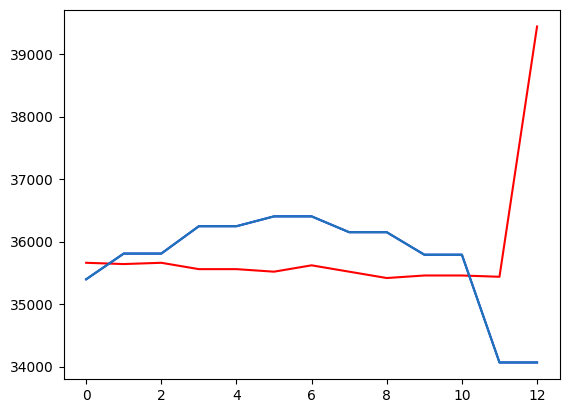

In [558]:
plt.plot(model.scaler.inverse_transform(prediction).reshape(-1), c='r')
plt.plot(batch_data.future_target_cdf.reshape(-1), c='b')
plt.plot(model.scaler.inverse_transform(future_target_cdf).reshape(-1))

In [559]:
batch_data.past_target_cdf.shape

torch.Size([1, 40, 1])

In [560]:
# context_length = data_manager.context_length
# prediction_length = data_manager.prediction_length
# past_range = range(0, context_length)
# future_range = range(context_length, context_length + prediction_length)
# full_range = range(0, context_length + prediction_length)
#
# for i in range(min(10, forecaster.target_dim)):
#     target = torch.cat([past_target_cdf[batch_idx, -context_length:, i], future_target_cdf[batch_idx, :, i]])
#     plt.figure(figsize=(10, 2))
#     plt.plot(full_range, target)
#     plt.plot(future_range, prediction[:, i])

In [561]:
# %%time
trainer.test(model=model, datamodule=data_module);

/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing: |          | 0/? [00:00<?, ?it/s]

/Users/andreichernov/miniforge3/envs/probts/lib/python3.10/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      13_test_CRPS          0.14245367050170898
    13_test_CRPS-Sum        0.14245367050170898
      13_test_MASE           3.769092082977295
       13_test_MSE              857140.6875
     13_test_MSE-Sum            857140.6875
       13_test_ND           0.14245367050170898
     13_test_ND-Sum         0.14245367050170898
      13_test_NRMSE         0.16772165894508362
    13_test_NRMSE-Sum       0.16772165894508362
   13_test_weighted_ND      0.14245367050170898
 13_test_weighted_ND-Sum    0.14245367050170898
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [562]:
future_target_cdf.shape

torch.Size([1, 13, 1])

In [563]:
from probts.utils import repeat

repeat(torch.rand(5, 2).unsqueeze(1), 10, 1).shape

torch.Size([5, 10, 2])